# Вычислительная математика. Домашняя лабораторная работа №1. Тема: "Задача Коши для систем ОДУ".
## Выполнил: Хайдари Фарид, группа Б01-008.
## Номер: VIII.11.4
![alt text](task.png "Title")

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# начальные значения
u0 = np.array([0.5, 0, 0, 1.73])

# границы интервала времени
t0 = 0
t1 = 20

In [3]:
def f(time, u):
    return np.array([
      u[2], 
      u[3], 
      - 1.0 * u[0] / ((u[0] ** 2 + u[1] ** 2) ** 1.5), 
      - 1.0 * u[1] / ((u[0] ** 2 + u[1] ** 2) ** 1.5), 
    ])

def solve_and_print(time, start_p, method, step = 1e-3):
  u = np.transpose(method(time, start_p, step))

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.plot(u[0], u[1], u[2], label='solution')
  ax.set_xlabel("X", fontsize=15)
  ax.set_ylabel("Y", fontsize=15)
  ax.set_zlabel("Z", fontsize=15)
  plt.draw()
  plt.show()

In [4]:
f(0, u0)

array([ 0.  ,  1.73, -4.  , -0.  ])

Имеем систему ДУ:
$$
\frac{d \overrightarrow{u}}{dt} = f\left(t, \overrightarrow{u}\right), \:
\overrightarrow{u} = 
\left[
  \begin{matrix}
  x\\y\\z\\u
  \end{matrix}
\right]
$$
С начальными условиями
$$
\overrightarrow{u}(0) = \overrightarrow{u_0} = 
\left[
  \begin{matrix}
  x_0\\y_0\\z_0\\u_0
  \end{matrix}
\right]
$$

Для метода Рунге-Кутты 4 порядка имеем
$$
f_1 = f\left(t_n, \overrightarrow{y_n}\right) \:\:\:\:\:\:\:\:
f_2 = f\left(t_n + \frac{\tau}{2}, \overrightarrow{y_n} + \frac{\tau}{2}f_1\right)
$$
$$
f_3 = f\left(t_n + \frac{\tau}{2}, \overrightarrow{y_n} + \frac{\tau}{2}f_2\right) \:\:\:\:\:\:\:\:
f_4 = f\left(t_n + \tau, \overrightarrow{y_n} + \tau f_3\right)
$$
$$
\overrightarrow{y_{n+1}} = \overrightarrow{y_n} + 
\frac{\tau}{6}\left(
f_1 + 2f_2 + 2f_3 + f_4
\right)
$$
Где $\overrightarrow{y}$  дискретизованное значение $\overrightarrow{u}$ по сетке, $\tau$ - шаг по времени

In [5]:
def runge_kutta4(t_end, u0, tau):
  u_prev = np.array(u0)
  u = [u_prev]

  for t_n in np.arange(tau, t_end + tau, tau):
    f_1 = f(t_n, u_prev)
    f_2 = f(t_n + tau / 2, u_prev + tau / 2 * f_1)
    f_3 = f(t_n + tau / 2, u_prev + tau / 2 * f_2)
    f_4 = f(t_n + tau, u_prev + tau * f_3)

    u_next = u_prev + tau / 6 * (f_1 + 2 * f_2 + 2 * f_3 + f_4)
    u_prev = u_next
    u.append(u_next)

  return u

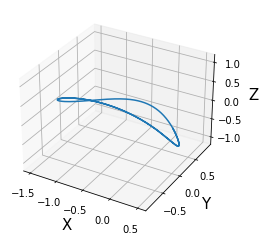

In [6]:
solve_and_print(10, start_p=u0, method=runge_kutta4, step=1e-3)